<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Visualizing Decision Trees

_Authors: Kiefer Katovich (SF), Matt Brems (DC)_

**Library Note**

In order to run the below on your machine you may have to install or update a few new packages.

**Pydotplus**
```
pip install pydotplus
```

_and its dependency_

**Graphviz**
```
brew install graphviz
```

In [1]:
import numpy as np
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor

from ipywidgets import *
from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(9, 7))
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# We will make some data for these functions of 100 points of x from 0.1 to 10:
# 
# 1. The general log function for x
# 2. The sin function
# 3. The exponential function
# 4. The x**2 function
#
def make_data(points=100):
    x = np.linspace(0.1, 10, points)
    
    data = {
        'x':x,
        'ygenlog':stats.genlogistic.pdf(x, 20)*500 + np.random.normal(0, 2, size=points),
        'ysin':np.sin(x)*20 + np.random.normal(0, 2, size=points),
        'yexp':np.exp(x/1.3) + np.random.normal(0, 2, size=points),
        'ysq':(x-5)**2 + np.random.normal(0, 1, size=points)
    }

    return data

# The data is put into a dictionary for convenience:
d = make_data()
x = d['x']

/Users/mattbrems/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


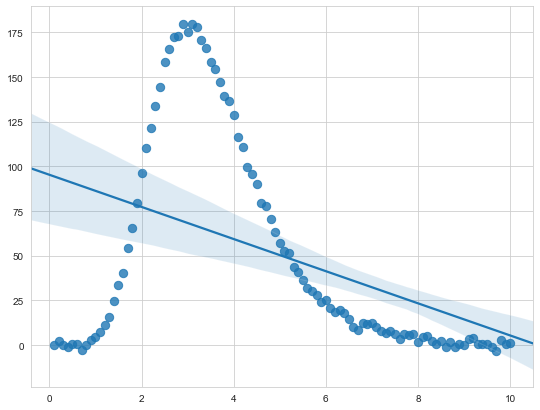

In [3]:
fig = plt.figure(figsize=(9, 7))
sns.regplot(x=x, y=d['ygenlog'], scatter_kws={'s':70})

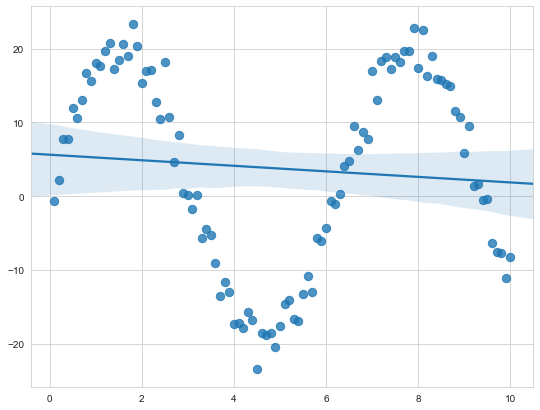

In [4]:
fig = plt.figure(figsize=(9, 7))
sns.regplot(x=x, y=d['ysin'], scatter_kws={'s':70})

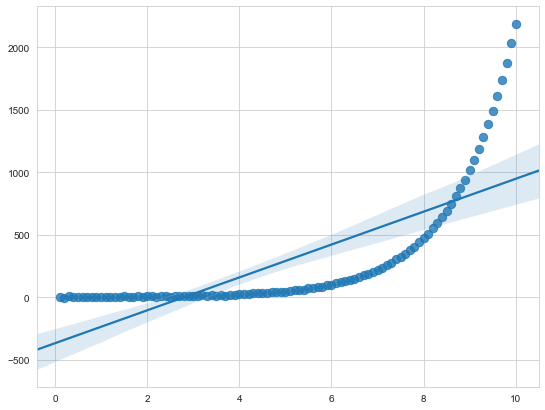

In [5]:
fig = plt.figure(figsize=(9, 7))
sns.regplot(x=x, y=d['yexp'], scatter_kws={'s':70})

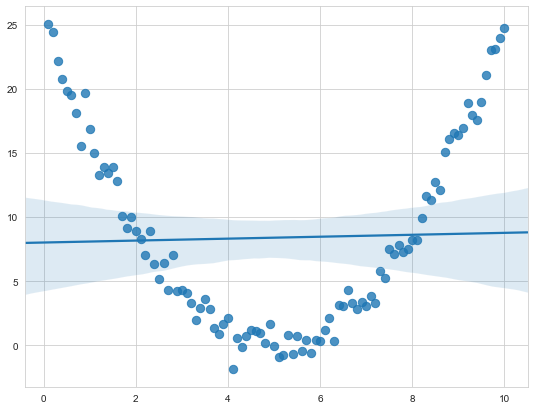

In [6]:
fig = plt.figure(figsize=(9, 7))
sns.regplot(x=x, y=d['ysq'], scatter_kws={'s':70})

In [7]:
# This function builds trees for an x and y predictor and dependent variable from depth 1 to 10.
# (Regression trees)
# Tree predictions are put into a dictionary:
# 
def build_tree_models(x, y, tree_depth_range=range(1,11)):
    tree_model_ypreds = {}
    
    for i in tree_depth_range:
        model = DecisionTreeRegressor(max_depth=i)
        model.fit(x[:, np.newaxis], y)
        tree_model_ypreds[i] = model.predict(x[:, np.newaxis])
        
    return tree_model_ypreds

# A function to iterate through our data dictionary of different functions and build the tree models:
#
def fit_trees(data_dict):
    trees_dict = {}
    x = data_dict['x']
    for label, ys in data_dict.items():
        if not label == 'x':
            tree_ys = build_tree_models(x, ys)
            trees_dict[label] = tree_ys
    
    return trees_dict

tr = fit_trees(d)
    

In [8]:
# This function plots the x and y data as well as the decision tree decisions for the predicted y:
#
def tree_plotter(d, tr, label, treenum):
    fig = plt.figure(figsize=(9, 7))
        
    x = d['x']
    y_true = d[label]
    y_pred = tr[label][treenum]
    
    ax = sns.regplot(x=x, y=y_true, scatter_kws={'s':70}, fit_reg=False, x_ci=None, ci=None)
    
    ax.plot(x, y_pred, c="#D7B734", linewidth=5)
    
    ax.set_title('Tree depth: '+str(treenum)+'\n', fontsize=20)
    
    plt.show()
    

# Widget inputs code:
#
def tree_plot_vars(function='ysq', treenum=1):
    tree_plotter(d, tr, function, treenum)
    

In [9]:
widgets.interact(tree_plot_vars,
                 function=['ysq','yexp','ysin','ygenlog'],
                 treenum=widgets.IntSlider(min=1, max=10, step=1, value=1))

interactive(children=(Dropdown(description='function', options=('ysq', 'yexp', 'ysin', 'ygenlog'), value='ysq'…

<function __main__.tree_plot_vars(function='ysq', treenum=1)>

In [10]:
# Make a single regression tree model with depth 3 for x**2 function:
# 
x = d['x']
y = d['ysq']

dtree = DecisionTreeRegressor(max_depth=5)
dtree.fit(x[:, np.newaxis], y)


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

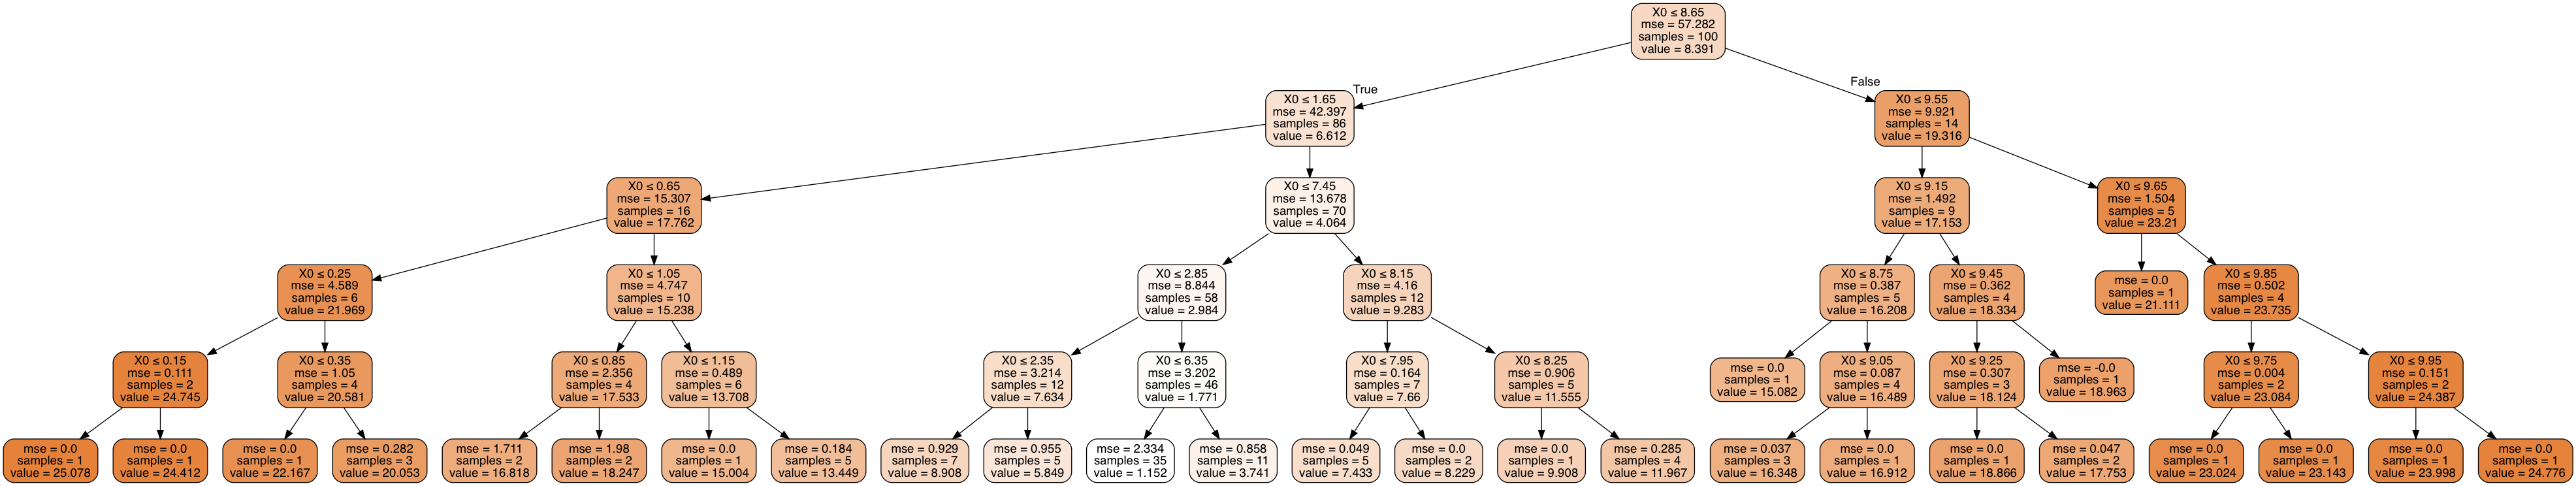

In [11]:
# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

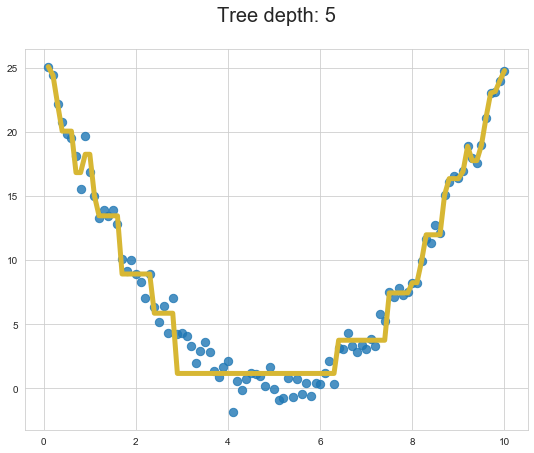

In [12]:
# Plot the decisions for y based on the decision tree DAG above
tree_plotter(d, tr, 'ysq', 5)